In [1]:
# pandas 데이터 사용법

import pandas as pd
import numpy as np
srs1 = pd.Series([10,20,30,40,50,60],dtype=float)

print(srs1[1])
print(srs1[0])
print(srs1[2],srs1[3])
print(srs1[[2,3]])
print(srs1.index,srs1.values)

# 자료 유형 변경
srs1.astype(int)
# srs1.astype(np.float32)
print()

20.0
10.0
30.0 40.0
2    30.0
3    40.0
dtype: float64
RangeIndex(start=0, stop=6, step=1) [10. 20. 30. 40. 50. 60.]



In [2]:
# pandas의 date_range 함수
dates = pd.date_range('2020-07-27','2020-07-31')
temp1 = pd.Series([27,31,28,29,30],index=dates)
print(temp1)
print()

temp2 = pd.Series([30,33,25,29,32],index=dates)
temp_diff = temp2 - temp1
print(temp_diff)
print(temp_diff['2020-07-31'],temp_diff[4])

2020-07-27    27
2020-07-28    31
2020-07-29    28
2020-07-30    29
2020-07-31    30
Freq: D, dtype: int64

2020-07-27    3
2020-07-28    2
2020-07-29   -3
2020-07-30    0
2020-07-31    2
Freq: D, dtype: int64
2 2


In [3]:
srs3 = pd.Series([[1,2,3,4],[5,6,7,8]])

print(srs3.index)
print(srs3.values)
print(srs3[0])
print(srs3[0][0])
print(srs3[[0,1]])
# index 위주로 출력

RangeIndex(start=0, stop=2, step=1)
[list([1, 2, 3, 4]) list([5, 6, 7, 8])]
[1, 2, 3, 4]
1
0    [1, 2, 3, 4]
1    [5, 6, 7, 8]
dtype: object


In [5]:
srs3 = pd.DataFrame([[1,2,3,4],[5,6,7,8]])

print(srs3)
print(srs3[0])
print(srs3[0][0])
print(srs3[[0,1]])
# column 위주로 출력

   0  1  2  3
0  1  2  3  4
1  5  6  7  8
0    1
1    5
Name: 0, dtype: int64
1
   0  1
0  1  2
1  5  6


In [6]:
srs3 = pd.DataFrame([[1,2,3,4],[5,6,7,8]],columns=['a','b','c','d'],index=['aa','bb'])

print(srs3)
print(srs3['b'])
print()
print(srs3['b'][0]) #print(srs3['b']['aa'])
print(srs3[['b','c']])

    a  b  c  d
aa  1  2  3  4
bb  5  6  7  8
aa    2
bb    6
Name: b, dtype: int64

2
    b  c
aa  2  3
bb  6  7


In [8]:
srs3.index = ['cc','dd']
srs3.columns = ['one','two','three','four']

print(srs3)

    one  two  three  four
cc    1    2      3     4
dd    5    6      7     8


In [11]:
dates = pd.date_range('2020-07-27','2020-07-31')

temp1 = pd.Series([27,31,28,29,30],index=dates)
temp2 = pd.Series([30,33,25,29,32],index=dates)

temp_df = pd.DataFrame({'Seoul':temp1, 'Pusan':temp2,})
print(temp_df)
print()
print(temp_df['Seoul'])
print(temp_df['Seoul']['2020-07-31'])

#print(temp_df['2020-07-31']) >> error

            Seoul  Pusan
2020-07-27     27     30
2020-07-28     31     33
2020-07-29     28     25
2020-07-30     29     29
2020-07-31     30     32

2020-07-27    27
2020-07-28    31
2020-07-29    28
2020-07-30    29
2020-07-31    30
Freq: D, Name: Seoul, dtype: int64
30


In [12]:
#temp_df2 = pd.DataFrame([temp1,temp2]) >> error (column명 x)

temp1.name = 'Seoul'
temp2.name = 'Pusan'
temp_df2 = pd.DataFrame([temp1,temp2])

temp_df2

,2020-07-27,2020-07-28,2020-07-29,2020-07-30,2020-07-31
Seoul,27,31,28,29,30
Pusan,30,33,25,29,32


In [13]:
temp_df2.loc['Seoul']
# loc : 우리가 부여한 이름 사용

2020-07-27    27
2020-07-28    31
2020-07-29    28
2020-07-30    29
2020-07-31    30
Freq: D, Name: Seoul, dtype: int64

In [14]:
temp_df2.iloc[0]
# iloc : 원래부터 부여되어져있던 index 사용

2020-07-27    27
2020-07-28    31
2020-07-29    28
2020-07-30    29
2020-07-31    30
Freq: D, Name: Seoul, dtype: int64

In [16]:
from IPython.display import display
# IPython shell 환경에서 dataframe을 table형식으로 보여줌
df = pd.DataFrame(np.array([[1,2,3],[10,20,30],[7,8,9]]),index=[1,'B',2],columns=['T','N','P'])
display(df)

,T,N,P
1,1,2,3
B,10,20,30
2,7,8,9


In [21]:
dates = pd.date_range('2020-07-27','2020-07-31')

temp1 = pd.Series([27,31,28,0,30],index=dates)
temp2 = pd.Series([30,33,25,29,32],index=dates)
temp3 = pd.Series([27,25,26,0,28],index=dates,name='Kwangju')
temp4 = pd.Series([29,0,26,28,30],index=dates)

temp5 = pd.concat([temp1,temp2],axis=1,keys=['Seoul','Pusan'])
temp6 = pd.concat([temp5,temp3],axis=1) # concat : 행 축으로 쌓음
display(temp6)

temp7 = temp5.append(temp3,ignore_index=True) # append : 열 축(옆으로)으로 쌓음
display(temp7)

,Seoul,Pusan,Kwangju
2020-07-27,27,30,27
2020-07-28,31,33,25
2020-07-29,28,25,26
2020-07-30,0,29,0
2020-07-31,30,32,28


,Seoul,Pusan,2020-07-27 00:00:00,2020-07-28 00:00:00,2020-07-29 00:00:00,2020-07-30 00:00:00,2020-07-31 00:00:00
0,27.0,30.0,NaN,NaN,NaN,NaN,NaN
1,31.0,33.0,NaN,NaN,NaN,NaN,NaN
2,28.0,25.0,NaN,NaN,NaN,NaN,NaN
3,0.0,29.0,NaN,NaN,NaN,NaN,NaN
4,30.0,32.0,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,27.0,25.0,26.0,0.0,28.0


In [23]:
# DataFrame 합치기 : merge >> 공통column이 있어야 가능하다

left = pd.DataFrame({'key':['foo','foo'],'lval':[1,2]})
right = pd.DataFrame({'key':['foo','foo'],'rval':[4,5]})
left_right = pd.merge(left,right,on='key')
left_right

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [26]:
left = pd.DataFrame({'key':['foo','bar'],'lval':[1,2]})
right = pd.DataFrame({'key':['foo','bar'],'rval':[4,5]})
pd.merge(left,right,on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [27]:
# column 추가

df = pd.DataFrame(np.array([[1,2,3],[10,20,30],[7,8,9]]),index=[1,'B',2],columns=['T','N','P'])
display(df)

df.loc[:,'Y'] = pd.Series([100,200,300],index=df.index)
display(df)

df['M'] = pd.Series([11,12,13],index=df.index)
display(df)

,T,N,P
1,1,2,3
B,10,20,30
2,7,8,9


,T,N,P,Y
1,1,2,3,100
B,10,20,30,200
2,7,8,9,300


,T,N,P,Y,M
1,1,2,3,100,11
B,10,20,30,200,12
2,7,8,9,300,13


In [28]:
# column 삭제

a = df.drop('T',axis=1,inplace=False) # inplace=False : 원본 df는 바뀌지x
display(df)
display(a)

df.drop('T',axis=1,inplace=True) # inplace=True : 원본 df에 변화된 내용 첨가o
display(df)

,T,N,P,Y,M
1,1,2,3,100,11
B,10,20,30,200,12
2,7,8,9,300,13


,N,P,Y,M
1,2,3,100,11
B,20,30,200,12
2,8,9,300,13


,N,P,Y,M
1,2,3,100,11
B,20,30,200,12
2,8,9,300,13


In [29]:
# row 삭제

df.drop(df.index[1],inplace=True)
display(df)

,N,P,Y,M
1,2,3,100,11
2,8,9,300,13


In [30]:
# data 수정

df.iloc[0,0] = 1000
display(df)

df.loc[1,'N'] = 2000
display(df)

x = pd.DataFrame({'x':[1,2,3],'y':[3,4,5]})
x.iloc[1] = {'x':9, 'y':99}
x

,N,P,Y,M
1,1000,3,100,11
2,8,9,300,13


,N,P,Y,M
1,2000,3,100,11
2,8,9,300,13


,x,y
0,1,3
1,9,99
2,3,5


In [31]:
temp6.loc['2020-07-27':'2020-07-29','Seoul':'Pusan']
temp6.loc[temp6['Seoul']>30,:]
temp6.loc[temp6['Seoul']>30,'Seoul':'Seoul']
temp6.loc[temp6['Pusan']>30]
temp6[temp6['Pusan']>30]

,Seoul,Pusan,Kwangju
2020-07-28,31,33,25
2020-07-31,30,32,28


In [32]:
print(temp6.Pusan[0:3])
print(temp6.Pusan[temp6.Pusan>30])
print(temp6[temp6.Seoul > 30])
print(temp6.Pusan['2020-07-27':'2020-07-29'])

print(temp6.iloc[[1,3]].Seoul)
print(temp6.Kwangju > 27)

2020-07-27    30
2020-07-28    33
2020-07-29    25
Freq: D, Name: Pusan, dtype: int64
2020-07-28    33
2020-07-31    32
Name: Pusan, dtype: int64
            Seoul  Pusan  Kwangju
2020-07-28     31     33       25
2020-07-27    30
2020-07-28    33
2020-07-29    25
Freq: D, Name: Pusan, dtype: int64
2020-07-28    31
2020-07-30     0
Freq: 2D, Name: Seoul, dtype: int64
2020-07-27    False
2020-07-28    False
2020-07-29    False
2020-07-30    False
2020-07-31     True
Freq: D, Name: Kwangju, dtype: bool


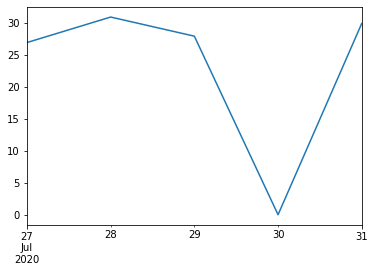

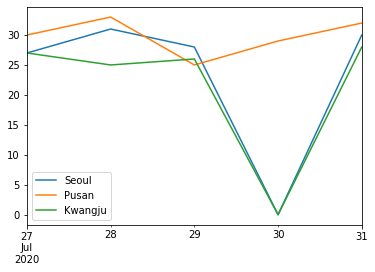

In [36]:
import matplotlib.pyplot as plt

temp6.Seoul.plot()
temp6.plot()
plt.show()

In [37]:
# 집합 관련 함수들
import numpy as np
a = np.array([[1,2,3],[3,2,1]])
b = np.array([[1,2,7],[4,5,6]])
print(np.unique(a)) # 중복 제거
print(np.in1d(a,3)) # a에 3이 있는지
print(np.isin(a,3)) # a에 3이 있는지

print(np.setdiff1d(a,b)) # a - b (차집합)
print(np.intersect1d(a,b)) # 교집합
print(np.union1d(a,b)) # 합집합
print(np.setxor1d(a,b)) # 합집합 - 교집합

[1 2 3]
[False False  True  True False False]
[[False False  True]
 [ True False False]]
[3]
[1 2]
[1 2 3 4 5 6 7]
[3 4 5 6 7]
